In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.sparse import csc_matrix, diags
from scipy.sparse.linalg import svds
mat = h5py.File('IPCADATA_FNW36_RNKDMN_CON.mat')
mat_t = np.transpose(mat['X'])
np.save('test.npy', mat_t)
X= np.load('test.npy')
GammaBeta_initial,s,v=svds(X.T@X, k=5)
GammaBeta_initial.shape


FileNotFoundError: ignored

simulate v, epsilon, f, to calculate r based on gammabeta

In [ ]:
v=[]
for i in range(1,38):
    v.append(np.random.normal(0,1,5))
v=np.array(v)

Z=[]
for i in range(1,38):
    Z.append(np.random.normal(0,1,599))
Z=np.array(Z)
Z.shape

f=np.random.normal(0,1,5)
f.reshape(1,-1)

epsilon=np.random.normal(0,1,37)
epsilon=epsilon.reshape(1,-1)
epsilon=epsilon.transpose()

In [ ]:
beta=Z@GammaBeta_initial+v
r=beta@f
r=r.reshape(1,-1).transpose()
r=r+epsilon


simulate v, epsilon, f, to calculate gammabeta based on r

In [ ]:
def sim():
    v=[]
    for i in range(1,38):
        v.append(np.random.normal(0,1,5))
    v=np.array(v)

    Z=[]
    X=[]
    for i in range(1,38):
        Z.append(np.random.normal(0,1,599))
        z=Z[i-1].reshape(1,-1)
        X.append(z.transpose()@r[i-1]/37)
    Z=np.array(Z)
    X=np.array(X)


    f=np.random.normal(0,1,5)
    f.reshape(1,-1)

    epsilon=np.random.normal(0,1,37)
    epsilon=epsilon.reshape(1,-1)
    epsilon=epsilon.transpose()
    GammaBeta_initial,s,u=svds(X.T@X, k=5)
    beta=Z@GammaBeta_initial+v
    r1=beta@f
    r1=r1.reshape(1,-1).transpose()
    r1=r1+epsilon
    rs=r-r1
    sum_squared_regression = sum(num ** 2 for num in rs)
    total_sum_of_squares = sum(num ** 2 for num in r)
    total_sum_of_squares
    rs=1-sum_squared_regression/total_sum_of_squares
    return rs
    #r_squared


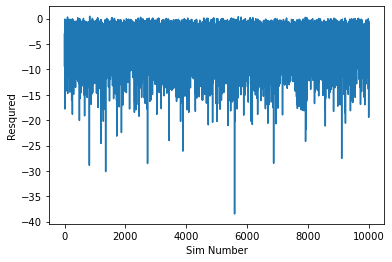

In [ ]:
num_simulations = 10000
balance =list(range(10000))
num_rolls =list(range(10000))

for i in range(num_simulations):
    a=sim()
    balance[i]=a
    num_rolls[i]=i+1

fig = plt.figure()

plt.xlabel("Sim Number")
plt.ylabel("Resqured")
plt.plot(num_rolls, balance)
